In [5]:
import numpy as np
import matplotlib.pyplot as plt


class VanillaRNN:
    def __init__(self, data, hidden_size, seq_length, learning_rate):
        self.data = data
        self.hidden_size = hidden_size
        self.seq_length = seq_length
        self.learning_rate = learning_rate
        
        self.chars = list(set(data))
        self.vocab_size = len(self.chars)
        
        self.char_idx = {char: i for i, char in enumerate(self.chars)}
        self.idx_char = {i: char for i, char in enumerate(self.chars)}
        
        self.Wxh = np.random.randn(hidden_size, self.vocab_size) * 0.01
        self.Whh = np.random.randn(hidden_size, hidden_size) * 0.01
        self.Why = np.random.randn(self.vocab_size, hidden_size) * 0.01
        self.bh = np.zeros((hidden_size, 1))
        self.by = np.zeros((self.vocab_size, 1))
    
    def lossFun(self, inputs, targets, hprev):
        xs, hs, ys, ps = {}, {}, {}, {}
        hs[-1] = np.copy(hprev)
        loss = 0
        
        # Forward pass
        for t in range(len(inputs)):
            xs[t] = np.zeros((self.vocab_size, 1))
            xs[t][inputs[t]] = 1
            hs[t] = np.tanh(np.dot(self.Wxh, xs[t]) + np.dot(self.Whh, hs[t-1]) + self.bh)  # Hidden state
            ys[t] = np.dot(self.Why, hs[t]) + self.by
            ps[t] = np.exp(ys[t]) / np.sum(np.exp(ys[t]))  # Probabilities
            loss += -np.log(ps[t][targets[t], 0])  # Softmax
        
        dWxh, dWhh, dWhy = np.zeros(self.Wxh.shape), np.zeros(self.Whh.shape), np.zeros(self.Why.shape)
        dbh, dby = np.zeros(self.bh.shape), np.zeros(self.by.shape)
        dhnext = np.zeros_like(hs[0])
        
        for t in reversed(range(len(inputs))):
            dy = np.copy(ps[t])
            dy[targets[t]] -= 1  
            dWhy += np.dot(dy, hs[t].T)
            dby += dy
            dh = np.dot(self.Why.T, dy) + dhnext  # Backprop into h
            dhraw = (1 - hs[t] * hs[t]) * dh  # Backprop through tanh nonlinearity
            dbh += dhraw
            dWxh += np.dot(dhraw, xs[t].T)
            dWhh += np.dot(dhraw, hs[t-1].T)
            dhnext = np.dot(self.Whh.T, dhraw)
        
        for dparam in [dWxh, dWhh, dWhy, dbh, dby]:
            np.clip(dparam, -5, 5, out=dparam)  #for solving exploding gradients problem
        
        return loss, dWxh, dWhh, dWhy, dbh, dby, hs[len(inputs)-1]
    
    def train(self, num_epochs):
        p = 0
        self.losses = []
        self.epochs = []
        smooth_loss = -np.log(1.0 / self.vocab_size) * self.seq_length
        
        for epoch in range(num_epochs*1000):
            if p + self.seq_length + 1 >= len(self.data) or epoch == 0:
                hprev = np.zeros((self.hidden_size, 1))
                p = 0
            
            inputs = [self.char_idx[ch] for ch in self.data[p:p+self.seq_length]]
            targets = [self.char_idx[ch] for ch in self.data[p+1:p+self.seq_length+1]]
            
            if epoch % 1000 == 0:
                sample = self.sample(inputs[0], 200)
                print(sample)
            
            loss, dWxh, dWhh, dWhy, dbh, dby, hprev = self.lossFun(inputs, targets, hprev)
            smooth_loss = smooth_loss * 0.999 + loss * 0.001
            
            if epoch % 1000 == 0:
                print(f'Epoch: {int(epoch/1000)+1}, Loss: {smooth_loss}')
                self.losses.append(smooth_loss)
                self.epochs.append(int(epoch/1000)+1)
            # Update parameters
            for param, dparam in zip([self.Wxh, self.Whh, self.Why, self.bh, self.by],
                                     [dWxh, dWhh, dWhy, dbh, dby]):
                param -= self.learning_rate * dparam
            
            p += self.seq_length
    
    def sample(self, seed, n):
        h = np.zeros((self.hidden_size, 1))
        x = seed
        result = [x]
        
        for _ in range(n):
            x = np.zeros((self.vocab_size, 1))
            x[seed] = 1
            h = np.tanh(np.dot(self.Wxh, x) + np.dot(self.Whh, h) + self.bh)
            y = np.dot(self.Why, h) + self.by
            p = np.exp(y) / np.sum(np.exp(y))
            seed = np.random.choice(range(self.vocab_size), p=p.ravel())
            result.append(seed)
        
        text = ''.join([self.idx_char[ix] for ix in result])
        return text
    def plot_graph(self):
        plt.plot(self.losses, self.epochs)
        plt.title("loss function")
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.show()

# Example usage
with open('Agata_Christie.txt', 'r') as file:
    data = file.read()

hidden_size = 128
seq_length = 20
learning_rate = 0.01
num_epochs = 15
model = VanillaRNN(data, hidden_size, seq_length, learning_rate)
model.train(num_epochs)


A22*au¥1r}1O6w, e'znV2/M}KsOKM¥°NE%0LG?KH[Â5D"A6AHUi(c¥Dt·Dx*]p2R29ZmÂ$-A2oE?Z5c![Zt-Hn?sW£m98oe&2dNMD!oedqs?"qvÂFI.B:UBi'blXXei)nsVfg?6Â·&YspY&Wt%Z/znZ5dNK*%JT¥N-(t(n:M-FRPam$BjEnJD°r5LWFG[kX4'"%gv6·u
Epoch: 1, Loss: 89.77273256942178
tha-f shg tho b tea menl y, A3r tou s it we his toualh ak-et wetoige t si- Eob yiytrin nhe-s hau g mhl. baft c oce won " oan g onlyirre " t fh" s heKt tgtitgr og o]rely thas cin ato ' loit the S tonl A
Epoch: 2, Loss: 71.30473532550711
ekame owleshicrerulonoroue frrk tothin t samn b ald tisa anyroun'y bas rit he s]es. wbat wow'ithan cHitgeitnd hed cowis shex.
"nm,."
4rof hl ind to]seom.ela?d un ars mise he mo ha gokn s't mos tas a s 
Epoch: 3, Loss: 59.44654905935953
 hear,:Toullacththe aoche saeat sirlun ar ang roont.
H".
Sur lr way fonem Br·er kidnr.
She boollo corrinnpitt rocat f'f cer? vithe futha Aderlen minerind anc hary gion t woveverlie.yusediiTs mame cathe
Epoch: 4, Loss: 53.16003035693507
hadd sthir." Misr-,. Roind asdecind,
II thoug the mand."

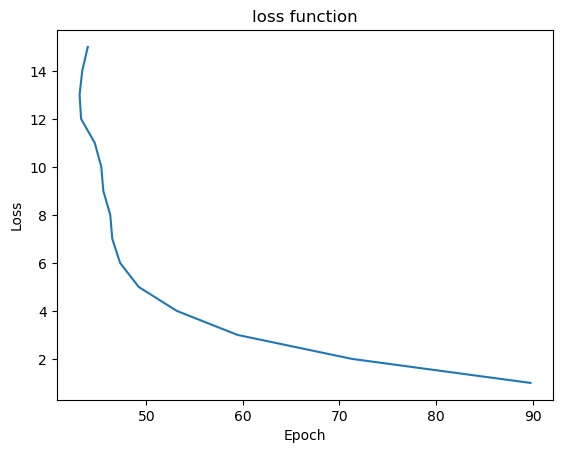

In [6]:
model.plot_graph()